In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from keras import utils as np_utils 
import numpy as np
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Bidirectional
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
from keras import utils as np_utils
import tensorflow as tf
from tensorflow import keras

#Importing training set

X = np.load("/content/(N_W)X_Data.npy",allow_pickle=True)
Y = np.load("/content/(N_W)Y_Data.npy",allow_pickle=True)

X_train, X_test, y_train , y_test  = train_test_split(X, Y, test_size = 0.30, random_state = 150, shuffle=True)

X_train = np.asarray(X_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')

X_train = X_train.reshape((X_train.shape[0], 196, 1))
X_test = X_test.reshape((X_test.shape[0], 196,1))

#Convert data into 3d tensor
#X_train = np.reshape(X_train,(1721,132,1))
#X_test = np.reshape(X_test,(574,132,1))




X_train = tf.cast(X_train,dtype=tf.float32)
X_test = tf.cast(X_test,dtype=tf.float32)
y_train = y_train 
y_test = y_test

y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

y_train=tf.cast(y_train,dtype=tf.float32)
y_test=tf.cast(y_test,dtype=tf.float32)


y_train.shape

TensorShape([8463, 2])

In [3]:
from keras.layers.pooling import AveragePooling1D
#Importing convolutional layers
from keras.models import Sequential
from keras.layers import Convolution1D
from keras.layers import MaxPooling1D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization



#Initialising the CNN
classifier = Sequential()

#Input shape must be explicitly defined, DO NOT USE (None,shape)!!!

classifier.add(Convolution1D(filters=8, kernel_size=1, activation="relu")) 
classifier.add(BatchNormalization())

classifier.add(Convolution1D(filters=16, kernel_size=2, activation="relu")) 
classifier.add(BatchNormalization())

classifier.add(Convolution1D(filters=16, kernel_size=3,activation="relu"))
classifier.add(BatchNormalization())

classifier.add(Convolution1D(filters=32, kernel_size=3,activation="relu"))
classifier.add(BatchNormalization())


classifier.add(Convolution1D(filters=32, kernel_size=3,activation="relu"))
classifier.add(BatchNormalization())

#Flattening
classifier.add(AveragePooling1D())
classifier.add(Flatten())


#Full Connection
classifier.add(Dropout(0.3))
classifier.add(Dense(2, activation = 'softmax'))


In [5]:
classifier.compile(loss = tf.keras.losses.BinaryCrossentropy(), run_eagerly=True, optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
# fit network
classifier.fit(X_train, y_train, epochs=150, batch_size=64)


Epoch 1/150


133/133 [==============================] - 25s 89ms/step - loss: 0.4480 - accuracy: 0.8204
Epoch 2/150
133/133 [==============================] - 11s 85ms/step - loss: 0.3656 - accuracy: 0.8517
Epoch 3/150
133/133 [==============================] - 11s 86ms/step - loss: 0.3221 - accuracy: 0.8688
Epoch 4/150
133/133 [==============================] - 11s 85ms/step - loss: 0.2855 - accuracy: 0.8827
Epoch 5/150
133/133 [==============================] - 11s 85ms/step - loss: 0.2675 - accuracy: 0.8911
Epoch 6/150
133/133 [==============================] - 11s 85ms/step - loss: 0.2468 - accuracy: 0.8999
Epoch 7/150
133/133 [==============================] - 11s 86ms/step - loss: 0.2337 - accuracy: 0.9030
Epoch 8/150
133/133 [==============================] - 11s 86ms/step - loss: 0.2266 - accuracy: 0.9100
Epoch 9/150
133/133 [==============================] - 11s 86ms/step - loss: 0.2109 - accuracy: 0.9169
Epoch 10/150
133/133 [==============================] - 11s 85ms/step - loss: 0.2068 

In [6]:
classifier.evaluate(X_test, y_test)

114/114 [==============================] - 3s 23ms/step - loss: 0.3846 - accuracy: 0.9107


[0.3846243619918823, 0.9106699824333191]

In [11]:
from sklearn.metrics import accuracy_score

print("Accuracy Score = ", accuracy_score(YY_test, YY_predict))

Accuracy Score =  0.9106699751861043


In [7]:
Predict = classifier.predict(X_test)

114/114 [==============================] - 2s 14ms/step


In [8]:
YY = y_test.numpy()
YY_test = np.argmax(YY,axis = 1)

YY_predict = np.argmax(Predict,axis = 1)


In [9]:
YY_predict

array([0, 0, 0, ..., 0, 0, 1])

In [10]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
cm = confusion_matrix(YY_test, YY_predict)

cm

array([[2300,  124],
       [ 200, 1003]])

In [13]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (8,8),
                           fontsize=14, normalize=True):
     
    if normalize:
        confusion_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]
        fmt = '.2f'
    else:
        fmt = 'd'

    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt= fmt)
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

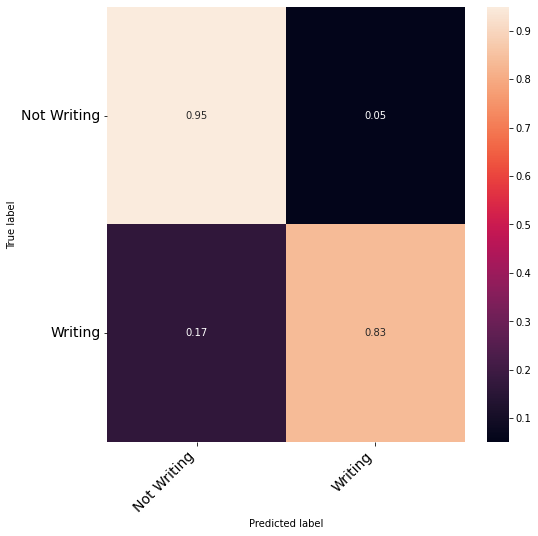

In [14]:
import seaborn as sns

#class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A',
 #                  'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L',
  #                 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W',
   #                'X', 'Y', 'Z']


#class_names = ['0,O,o','1,I,i,l ','2,Z,z','3','4','5,S,s','6,G','7','8','9,a,g,q','A',
 #                  'B', 'C,c', 'D,P,p,b', 'E,e', 'F,f', 'H,h', 'J,j ', 'K,k', 'L',
  #                 'M,m', 'N,n', 'Q','R','T,t', 'U,V,u,v', 'W,w','X,x', 'Y,y', 'd'] 

#class_names = ['0','1','2','3','4','5','6','7','8','9','A',
 #                'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L',
  #                'M', 'N', 'O', 'P', 'Q', 'R', 'S','T', 'U', 'V', 'W',
   #               'X', 'Y', 'Z','a',
    #             'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l',
     #             'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w',
      #            'x', 'y', 'z']

class_names = ['Not Writing','Writing']                   
print_confusion_matrix(cm, class_names)
plt.savefig('Confusion_Matix_.png', dpi=300)

In [15]:
from sklearn.metrics import classification_report

#report = classification_report(YY_test, YY_predict,target_names=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A',
 #                  'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L',
  #                 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W',
   #                'X', 'Y', 'Z'])

#report = classification_report(YY_test, YY_predict,target_names=['0,O,o','1,I,i,l ','2,Z,z','3','4','5,S,s','6,G','7','8','9,a,g,q','A',
 #                  'B', 'C,c', 'D,P,p,b', 'E,e', 'F,f', 'H,h', 'J,j ', 'K,k', 'L',
  #                 'M,m', 'N,n', 'Q','R','T,t', 'U,V,u,v', 'W,w','X,x', 'Y,y', 'd']) 

#report = classification_report(YY_test, YY_predict,target_names= ['0','1','2','3','4','5','6','7','8','9','A',
 #                'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L',
  #               'M', 'N', 'O', 'P', 'Q', 'R', 'S','T', 'U', 'V', 'W',
   #               'X', 'Y', 'Z','a',
    #             'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l',
     #             'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w',
      #            'x', 'y', 'z']) 

report = classification_report(YY_test, YY_predict,target_names= ['Not Writing','Writing'])
print(report)


              precision    recall  f1-score   support

 Not Writing       0.92      0.95      0.93      2424
     Writing       0.89      0.83      0.86      1203

    accuracy                           0.91      3627
   macro avg       0.90      0.89      0.90      3627
weighted avg       0.91      0.91      0.91      3627



In [ ]:
%%capture cap --no-stderr
print(report)

In [ ]:
with open('Classification_Report.txt', 'w') as f:
    f.write(cap.stdout)

In [16]:
from collections import Counter


correct = [pred == true for pred, true in zip(YY_predict, YY_test)]
correct = np.array(correct).flatten()
print(Counter(correct))

Counter({True: 3303, False: 324})


In [17]:
YY = np.array(y_test).flatten()
classifiedIndexes = np.where(YY_test==YY_predict)[0]
misclassifiedIndexes = np.where(YY_test!=YY_predict)[0]